# Homework 02

## Exersice 10

### Solution:

Assuming in the following $d$ days, $k$ days experienced a increase in price and $(d-k)$ days experienced a fall in price.

Day1: price = 1

After $d$ days, 
$$
price = 1 * r^{k-(d-k)} = r^{2k-d} (0 \leq k \leq d)
$$

the Probability of getting this price is,

$$
P[price = r^{2k-d}] = {d \choose k} p^k(1-p)^{d-k}
$$

Let $X$ be the stock price after d days

$$
\begin{align}
E[X] = \sum_{x}xp[X=x] = \sum_{k=0}^{d} r^{2k-d} {d \choose k}p^k (1-p)^{d-k} 
                        &= r^{-d} \sum_{k=0}^{d} r^{2k}{d \choose k}p^k (1-p)^{d-k} \\
                        &=  r^{-d} \sum_{k=0}^{d} {d \choose k} (pr^2)^k (1-p)^{d-k} \\
                        &= r^{-d} (pr^2+1-p)^d = （pr+ \frac{1-p}{r})^d
\end{align}
$$

Then,

$$
\begin{align}
E[X^2] = \sum_{k=0}^{d} r^{4k-2d} {d \choose k}p^k (1-p)^{d-k}
      &= r^{-2d} \sum_{k=0}^{d} {d \choose k}(pr^4)^k (1-p)^{d-k} \\
      &=  r^{-2d} (1-p+pr^4)^d \\
      &= （pr^2+ \frac{1-p}{r^2})^d
\end{align}
$$

$$
Var[X] = E[X^2]-E^2[X] = （pr^2+ \frac{1-p}{r^2})^d - （pr+ \frac{1-p}{r})^{2d}
$$

### Theoretical expectation and variance of X

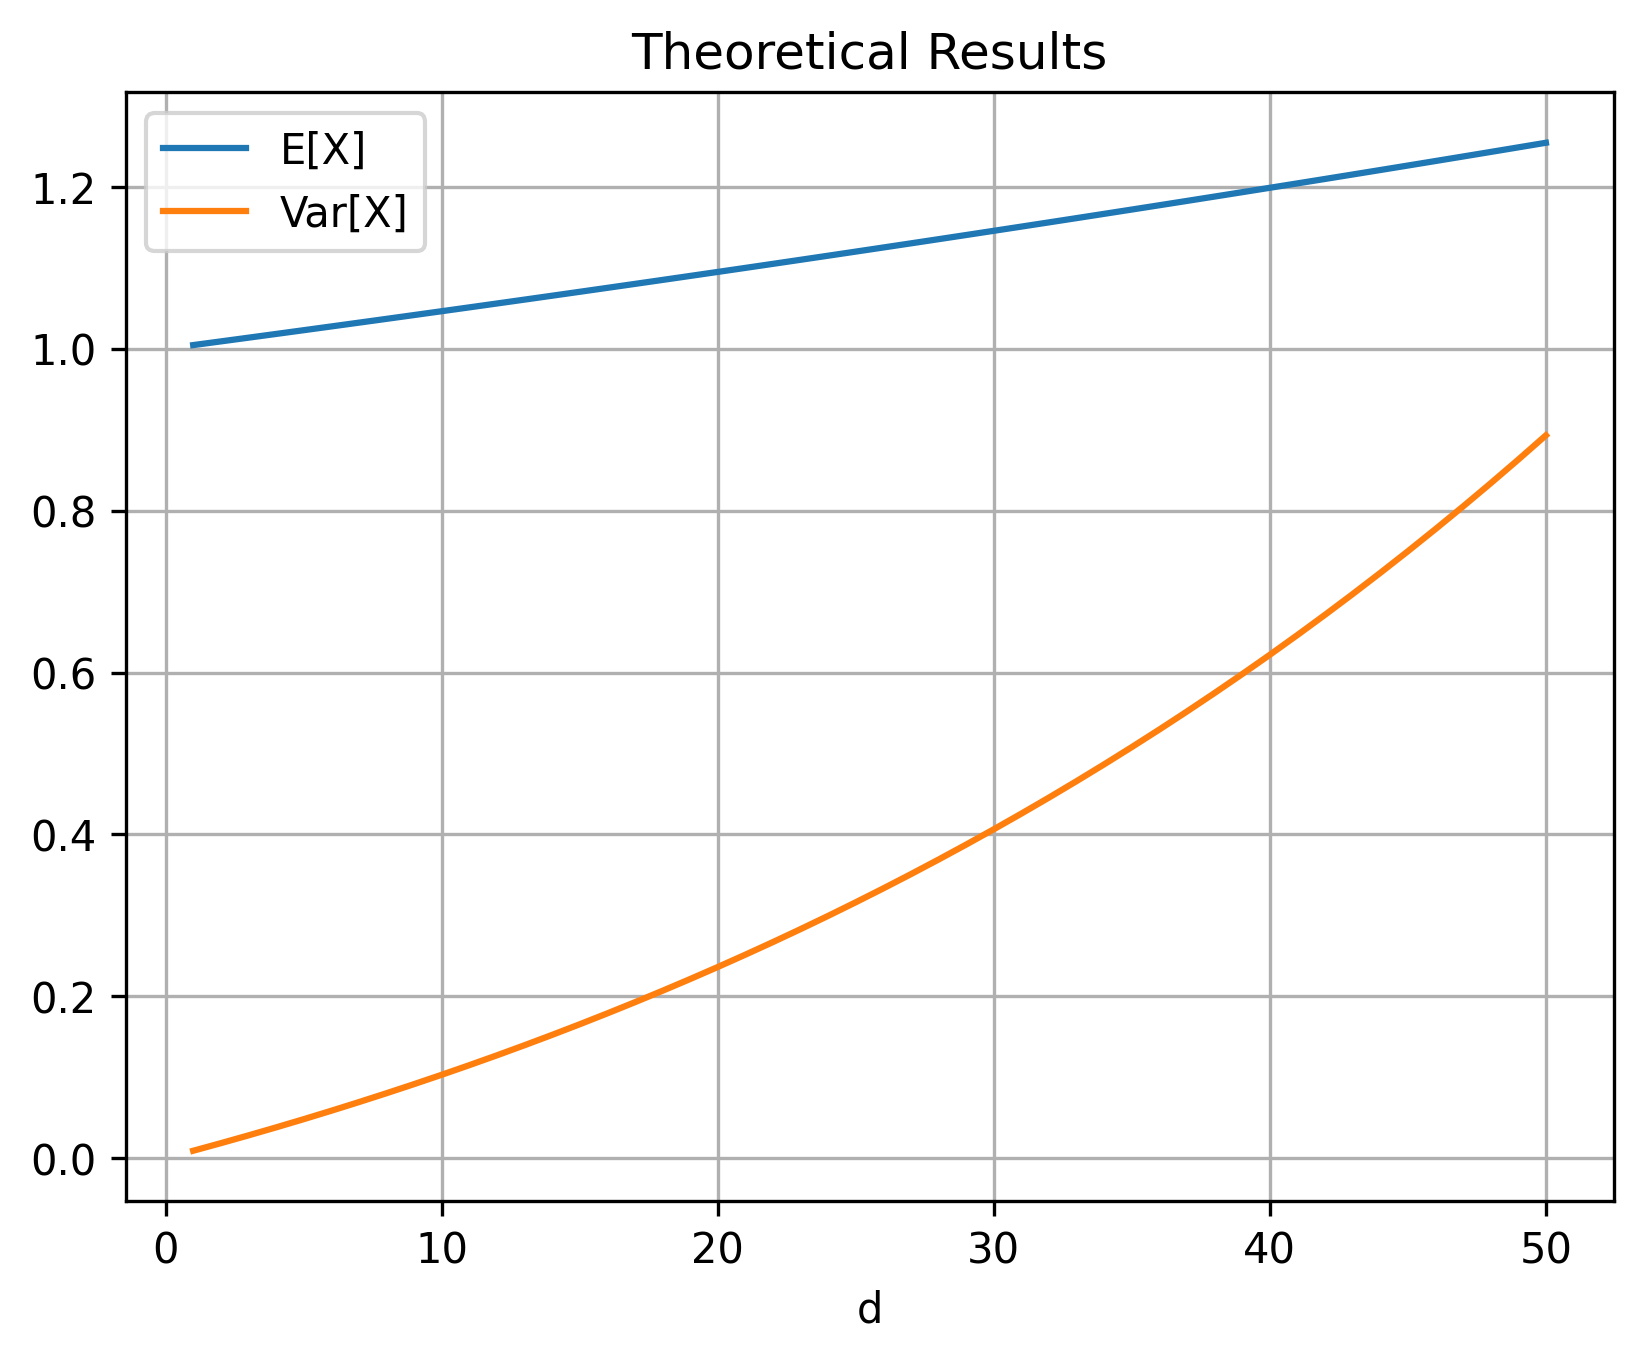

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

r = 1.1
p = 0.5
q = 1

d = np.arange(1,51,1)
expectation_x = (p*r+(1-p)/r)**d  # E[X]
expectation_x_2 = (p*r*r+(1-p)/(r*r))**d  # E[X^2]
variance_x = expectation_x_2 - (expectation_x)**2  # Var[X]

fig,ax = plt.subplots()

ax.plot(d,expectation_x,label='E[X]')
ax.plot(d,variance_x,label='Var[X]')
ax.set(xlabel='d')
ax.set_title('Theoretical Results')
ax.legend()
ax.grid()


### Stimulate 200 stocks over 50 days

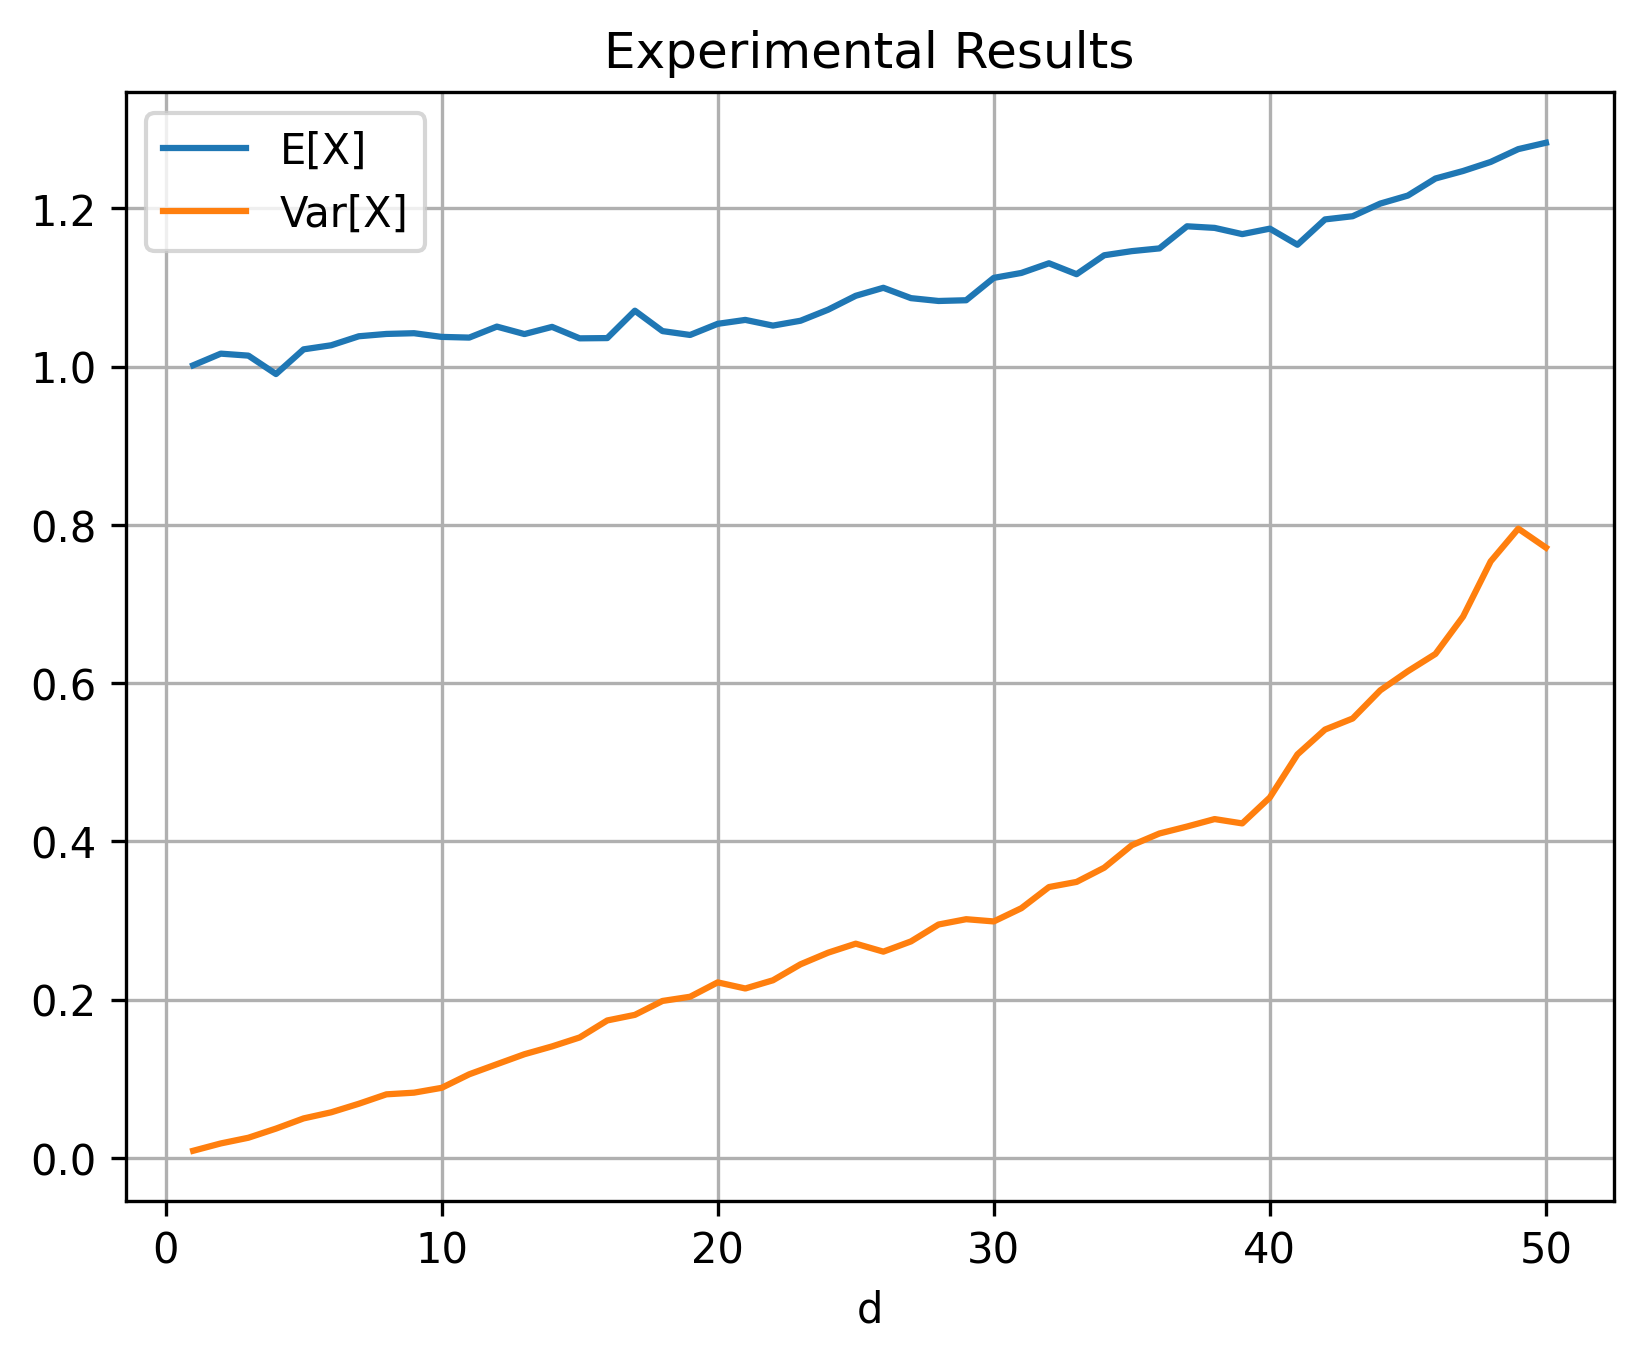

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

r = 1.1
p = 0.5
q = 1
stocks_number = 200
d = 50
# price = []

## price_initial is the initial value of 200 stocks' price, store all n days stocks' price into total_price
price_initial = np.ones(stocks_number,dtype=int)
total_price = np.empty([d+1,stocks_number])
total_price[0] = price_initial


## Function to get the expectation and variance of stock price (n days after)
def stocks_price_day_n(n,stocks_number):
    rise_or_fall = np.random.choice([r,1/r],stocks_number,p=[p,1-p])
    price_day_n = total_price[n-1] * rise_or_fall
    total_price[n] = price_day_n
    expectation_x_n = np.sum(price_day_n) / stocks_number
    variance_x_n = np.var(price_day_n)
    return expectation_x_n,variance_x_n

expectation_x_list = []
variance_x_list = []

for i in range(1,d+1):
    stocks_price_day_n(i,stocks_number)
    expectation_x_list.append(stocks_price_day_n(i,stocks_number)[0])
    variance_x_list.append(stocks_price_day_n(i,stocks_number)[1])

d = np.arange(1,51,1)
fig,ax = plt.subplots()
ax.plot(d,expectation_x_list,label='E[X]')
ax.plot(d,variance_x_list,label='Var[X]')
ax.set(xlabel='d')
ax.set_title('Experimental Results')
ax.legend()
ax.grid()

By Stimulating 200 stocks over 50 days, We got E[X] and Var[X] close to the theoretical value.

## Exersice  13

### Solution:



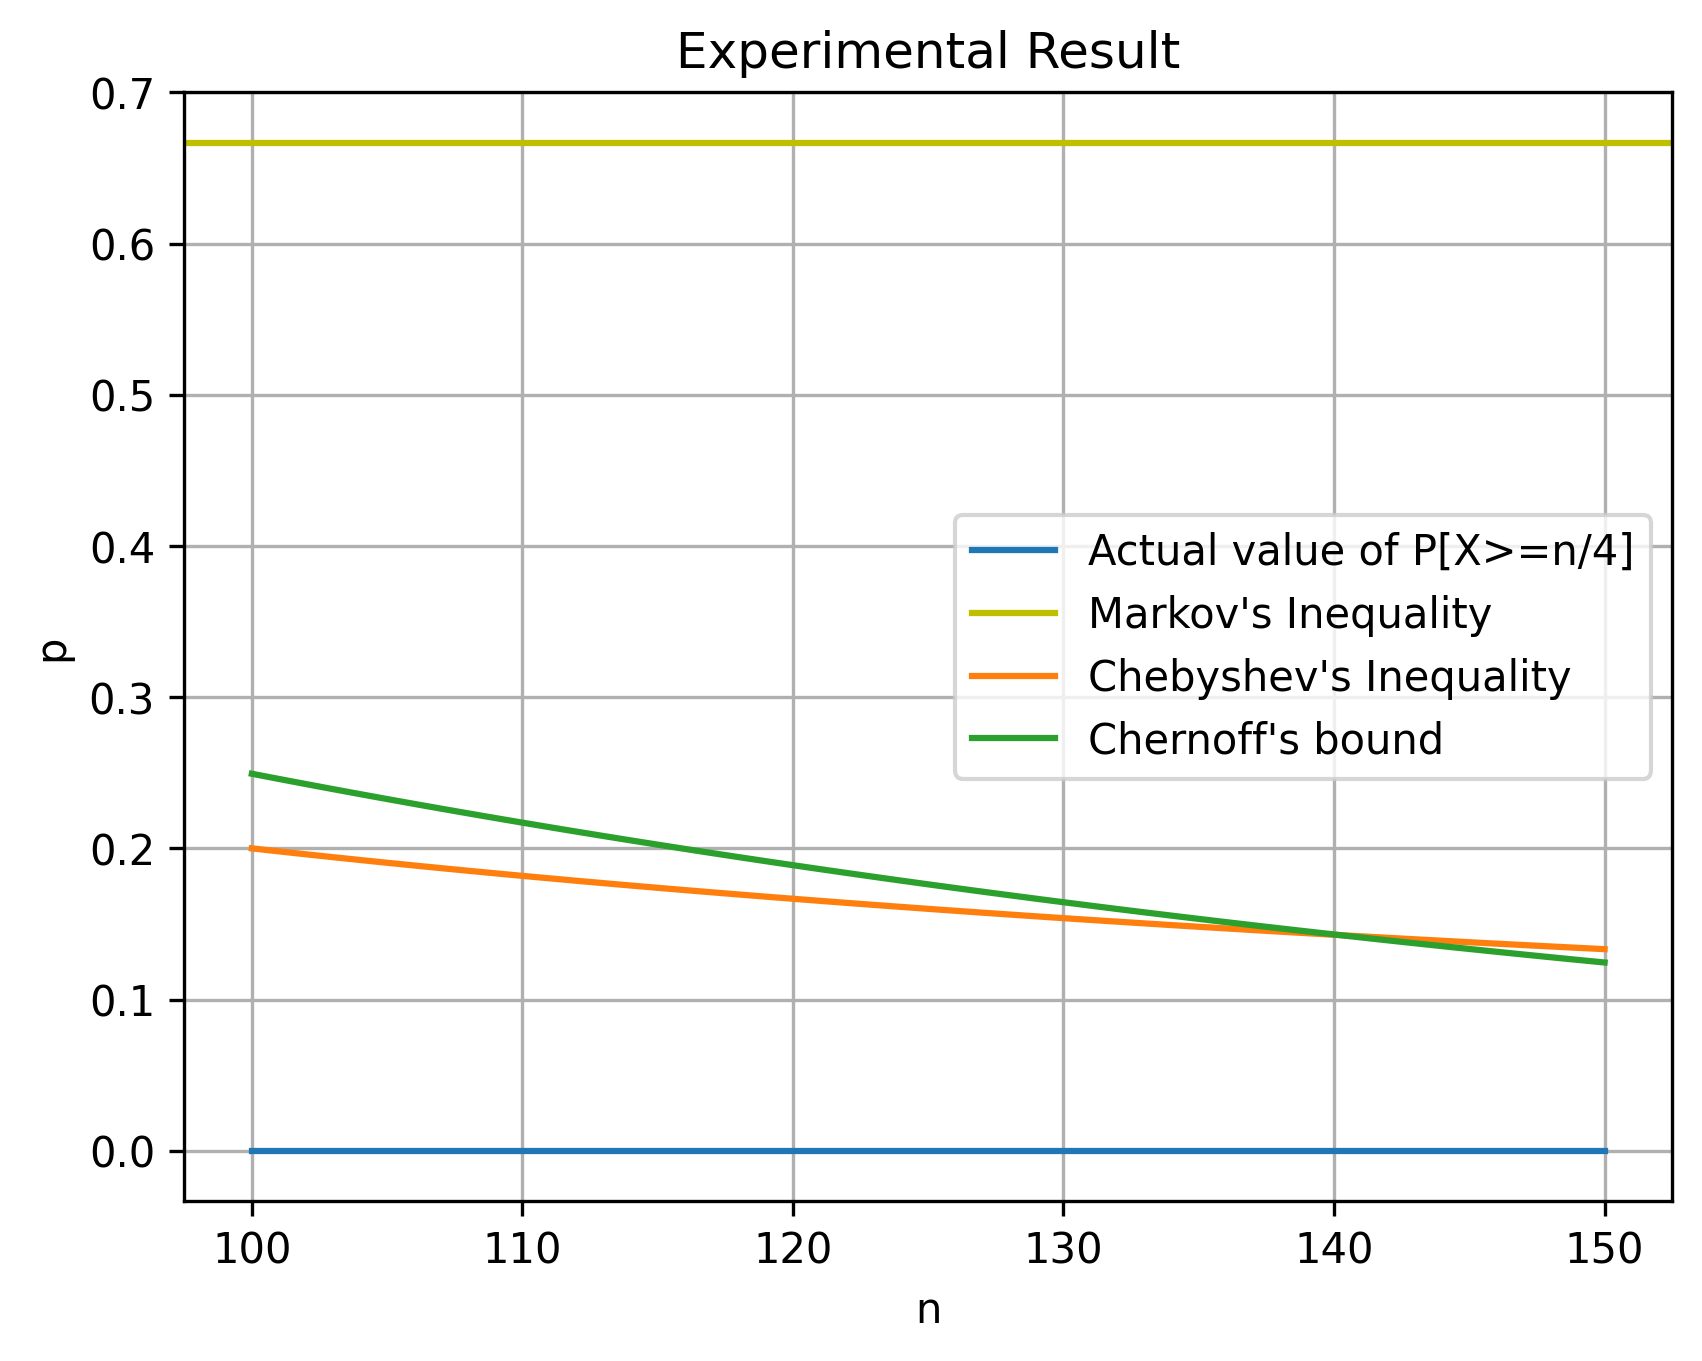

In [39]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

instances = 1000

def throws(n,instance):
    count = 0
    for i in range(n):
        a = np.random.choice([1,2,3,4,5,6],instance)
        count_6 = list(a).count(6)
        count += (count_6 >= instances/4)
    # print('count = {}'.format(count))
    return count/n

probability_X_list = []
for n in range(100,151):
    probability_X_list.append(throws(n,instances))


n = np.arange(100,151,1)
fig,ax = plt.subplots()
ax.plot(n,probability_X_list,label='Actual value of P[X>=n/4]')

plt.axhline(y=2/3,color='y',label="Markov's Inequality" )
ax.plot(n,20/(n),label="Chebyshev's Inequality")
ax.plot(n,np.exp(-n/72),label="Chernoff's bound")
ax.set(xlabel="n")
ax.set(ylabel="p")
ax.set_title('Experimental Result')
ax.legend()
ax.grid()
plt.show()


In [38]:
from scipy import optimize as opt
from math import exp

def func(t):
    return 20/t - exp(-t/72)

t = opt.fsolve(func,100)
t = t[0]

print('t_opt = {}, for which f(t_opt) = {}'.format(t,func(t)))

t_opt = 140.2170911208783, for which f(t_opt) = -6.106226635438361e-16


For $ 100 \leq n \leq 140 $,  Chebyshev's inequality gives a best approximation for p, Chernoff bounds come second.  
For $ 140 \leq n \leq 150 $,  Chernoff bounds give a best approximation for p, Chebyshev's inequality comes second.  
Markov's inequality is the weakest bound among three.